# 1. Import Libraries

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tqdm.auto import tqdm

warnings.filterwarnings("ignore")

np.random.seed(12345)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# 2. Read Data

In [2]:
data = pd.read_csv("sign_language_dataset.csv")

data

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_12279,pixel_12280,pixel_12281,pixel_12282,pixel_12283,pixel_12284,pixel_12285,pixel_12286,pixel_12287,label
0,98.0,77.0,81.0,97.0,75.0,78.0,98.0,76.0,76.0,102.0,...,140.0,102.0,115.0,142.0,106.0,118.0,145.0,113.0,121.0,A
1,91.0,76.0,79.0,92.0,80.0,82.0,96.0,80.0,84.0,103.0,...,142.0,105.0,117.0,144.0,107.0,119.0,146.0,110.0,122.0,A
2,99.0,78.0,78.0,97.0,77.0,80.0,97.0,78.0,79.0,98.0,...,147.0,110.0,118.0,146.0,106.0,116.0,146.0,105.0,115.0,A
3,70.0,55.0,56.0,73.0,57.0,60.0,74.0,58.0,62.0,75.0,...,122.0,86.0,96.0,120.0,86.0,92.0,121.0,88.0,93.0,A
4,71.0,58.0,61.0,68.0,57.0,61.0,72.0,59.0,62.0,79.0,...,117.0,85.0,92.0,121.0,87.0,96.0,121.0,88.0,97.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,54.0,36.0,30.0,52.0,35.0,32.0,52.0,35.0,32.0,55.0,...,82.0,60.0,57.0,81.0,59.0,57.0,86.0,61.0,60.0,Y
23996,53.0,36.0,30.0,52.0,36.0,30.0,50.0,35.0,30.0,52.0,...,82.0,58.0,56.0,81.0,58.0,57.0,85.0,61.0,62.0,Y
23997,48.0,36.0,30.0,48.0,36.0,29.0,50.0,35.0,30.0,52.0,...,84.0,58.0,56.0,85.0,57.0,56.0,88.0,61.0,59.0,Y
23998,49.0,37.0,35.0,50.0,36.0,35.0,52.0,35.0,33.0,51.0,...,80.0,58.0,54.0,80.0,57.0,53.0,84.0,60.0,58.0,Y


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Columns: 12289 entries, pixel_0 to label
dtypes: float64(12288), object(1)
memory usage: 2.2+ GB


### 3.1.2. Remove Missing Values

In [4]:
# no NaN to remove
# data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [5]:
data.describe()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_12278,pixel_12279,pixel_12280,pixel_12281,pixel_12282,pixel_12283,pixel_12284,pixel_12285,pixel_12286,pixel_12287
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,68.839958,50.969500,53.001625,69.512958,51.261708,53.238625,70.262542,51.554208,53.478750,71.045417,...,91.521125,102.799708,84.192500,93.114667,103.357875,85.373125,94.803042,103.823625,86.418625,96.338083
std,20.612534,17.458172,19.178120,20.659688,17.493769,19.207339,20.679209,17.493260,19.202916,20.733773,...,31.069675,23.911981,25.364327,31.649146,24.034221,25.615625,32.093426,23.973245,25.677787,32.376819
min,25.000000,21.000000,15.000000,25.000000,22.000000,15.000000,26.000000,21.000000,16.000000,28.000000,...,21.000000,7.000000,18.000000,20.000000,7.000000,16.000000,21.000000,8.000000,18.000000,19.000000
25%,53.000000,39.000000,39.000000,53.000000,39.000000,40.000000,54.000000,39.000000,40.000000,55.000000,...,70.000000,86.000000,67.000000,71.000000,87.000000,68.000000,73.000000,88.000000,69.000000,74.000000
50%,66.000000,46.000000,50.000000,67.000000,46.000000,50.000000,68.000000,46.000000,50.000000,69.000000,...,86.000000,100.000000,80.000000,87.000000,101.000000,82.000000,89.000000,102.000000,83.000000,91.000000
75%,82.000000,63.000000,64.000000,82.000000,63.000000,64.000000,83.000000,64.000000,64.000000,84.000000,...,112.000000,117.000000,102.000000,114.000000,118.000000,103.000000,117.000000,118.000000,104.000000,119.000000
max,141.000000,104.000000,115.000000,143.000000,105.000000,117.000000,143.000000,107.000000,117.000000,146.000000,...,199.000000,211.000000,195.000000,197.000000,214.000000,196.000000,200.000000,216.000000,195.000000,197.000000


### 3.2.2. Remove Outliers

In [6]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [7]:
target_name = "label"
feature_name = list(data.columns.drop(target_name))

In [8]:
X = data[feature_name]
y = data[target_name]

<AxesSubplot:>

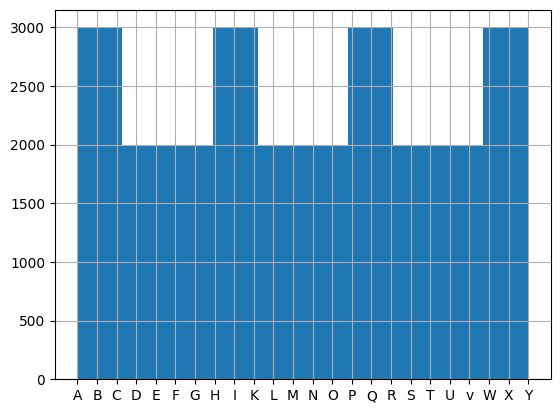

In [9]:
y.hist()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# ### 5. Data Preparation

## ### 5.1. Ordinal Encoding

## ### 5.2. One Hot Encoding

## 5.3. Feature Scaling

### 5.3.1. Training Set

In [11]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [12]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [13]:
clf = LogisticRegression(penalty="none")

## 6.2. Train Model

In [14]:
clf.fit(X_train_scaled, y_train)

LogisticRegression(penalty='none')

## 6.3. Model's Weight & Bias

In [15]:
clf.coef_

array([[-0.08346985, -0.02963894,  0.00143409, ...,  0.01711704,
        -0.09721702, -0.1149909 ],
       [-0.27963059, -0.09054754, -0.0706152 , ...,  0.03748472,
        -0.12371416, -0.17474949],
       [ 0.14053759,  0.23492489,  0.21022182, ..., -0.23322091,
        -0.11186914, -0.17689106],
       ...,
       [-0.2706906 , -0.36078949, -0.27356543, ...,  0.16814055,
         0.14239313,  0.16359117],
       [-0.07164566, -0.17522617, -0.17181687, ...,  0.0008648 ,
        -0.08210511, -0.16642444],
       [ 0.05432072, -0.0290054 ,  0.01709748, ..., -0.0635864 ,
        -0.01486611,  0.03256666]])

In [16]:
clf.intercept_

array([-0.15639178, -0.56303174, -1.42726694, -0.47871726, -0.05441737,
        0.55441053, -0.55181633, -0.85842457, -0.35078466,  0.02503053,
       -0.23573435, -0.68666604,  0.54825692, -0.34835107,  0.94237917,
       -0.18256323,  0.74280905,  0.13062519,  0.32937117,  1.01378963,
       -0.0896246 ,  1.84191874,  0.2487498 , -0.39355081])

# 7. Prediction

## 7.1. Training Set

In [17]:
y_pred_train = clf.predict(X_train_scaled)

## 7.2. Test Set

In [18]:
y_pred_test = clf.predict(X_test_scaled)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Confusion Matrix

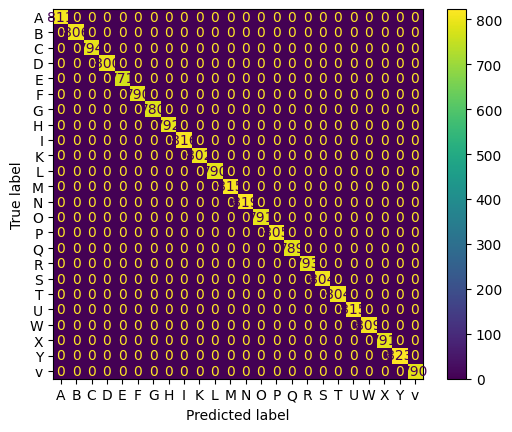

In [19]:
plot_confusion_matrix(clf, X_train_scaled, y_train)

### 8.1.2. Scoring

In [20]:
report = classification_report(y_train, y_pred_train, output_dict=True)

In [21]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
A,1.0,1.0,1.0,811.0
B,1.0,1.0,1.0,806.0
C,1.0,1.0,1.0,794.0
D,1.0,1.0,1.0,800.0
E,1.0,1.0,1.0,771.0
F,1.0,1.0,1.0,790.0
G,1.0,1.0,1.0,780.0
H,1.0,1.0,1.0,792.0
I,1.0,1.0,1.0,816.0
K,1.0,1.0,1.0,802.0


## 8.2. Test Set

### 8.2.1. Confusion Matrix

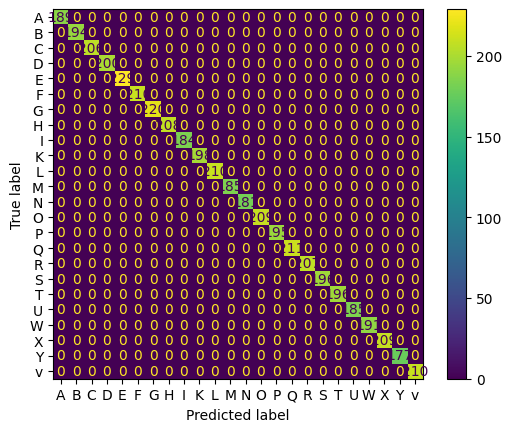

In [22]:
plot_confusion_matrix(clf, X_test_scaled, y_test)

### 8.2.2. Scoring

In [23]:
report = classification_report(y_test, y_pred_test, output_dict=True)

In [24]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
A,1.0,1.0,1.0,189.0
B,1.0,1.0,1.0,194.0
C,1.0,1.0,1.0,206.0
D,1.0,1.0,1.0,200.0
E,1.0,1.0,1.0,229.0
F,1.0,1.0,1.0,210.0
G,1.0,1.0,1.0,220.0
H,1.0,1.0,1.0,208.0
I,1.0,1.0,1.0,184.0
K,1.0,1.0,1.0,198.0


# 9. Save Model

In [25]:
import pickle

In [26]:
pickle.dump((clf, scaler), open("sign_language_model.pickle", "wb"))